# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

### Observable trends based on the data:

1.	Overall humidity in all selected cities is more intensely distributed within 50%-100% range, cloudiness is evenly distributed between 0-100%, while wind speed focuses in the range of 0-15%.	


2.  The temperature gets higher as approaching the equator. This is proven by the linear regression analysis between Max Temp vs. Latitude. In Northern Hemisphere, temperature is negatively related to latitude while in Southern Hemisphere temperature is positively related to latitude.


3.  All other factors- humidity, cloudiness and wind speeds have very low/no relationship with latitude, as there are more local factors that contribute to them. For these factors there are no obvious difference between Northern Hemisphere and Southern Hemisphere.


4.	Cloudiness is somewhat positively related to Humidity because clouds are formed from water and ice. The higher the humidity, the more water is available to make clouds.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

In [3]:
cities_df = pd.DataFrame(cities)
cities_df.to_csv("output_data/cities.csv")
cities

['puerto ayora',
 'saldanha',
 'georgetown',
 'khatanga',
 'saint george',
 'faanui',
 'san vicente',
 'esperance',
 'bambous virieux',
 'cabo san lucas',
 'hervey bay',
 'golkoy',
 'butaritari',
 'hasaki',
 'san cristobal',
 'new norfolk',
 'kapaa',
 'port elizabeth',
 'santa cruz',
 'buala',
 'arroyo',
 'port alfred',
 'xiongzhou',
 'avarua',
 'san patricio',
 'jamestown',
 'tiksi',
 'charlestown',
 'harda',
 'harrisonville',
 'malabo',
 'abong mbang',
 'dikson',
 'tiarei',
 'ushuaia',
 'prince george',
 'camopi',
 'orlik',
 'burnie',
 'rikitea',
 'marcona',
 'mana',
 'tuktoyaktuk',
 'merauke',
 'kamenskoye',
 'broken hill',
 'yangmei',
 'hobart',
 'namibe',
 'busselton',
 'noumea',
 'santa barbara',
 'cape town',
 'mataura',
 'kenai',
 'yellowknife',
 'victoria',
 'hilo',
 'teya',
 'samarai',
 'ponta do sol',
 'saint-philippe',
 'san policarpo',
 'bredasdorp',
 'loandjili',
 'barentsburg',
 'dudinka',
 'talnakh',
 'coquimbo',
 'aykhal',
 'atuona',
 'barrow',
 'chokurdakh',
 'geraldt

In [4]:
# Create the dataframe
city_weather = pd.DataFrame({"City": cities})
city_weather["Lat"] = ""
city_weather["Lng"] = ""
city_weather["Max Temp"] = ""
city_weather["Humidity"] = ""
city_weather["Cloudiness"] = ""

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'imperial'
query_url = f'{url}appid={weather_api_key}&units={units}&q='
for city in cities:    
    try:
        response = requests.get(query_url + city).json()
        print(f"Processing Record {cities.index(city)} | {city}")
        city_weather.loc[cities.index(city),"Lat"] = response['coord']['lat']
        city_weather.loc[cities.index(city),"Lng"] = response['coord']['lon']
        city_weather.loc[cities.index(city),"Max Temp"] = response['main']['temp_max']
        city_weather.loc[cities.index(city),"Humidity"] = response['main']['humidity']
        city_weather.loc[cities.index(city),"Cloudiness"] = response['clouds']['all']
        city_weather.loc[cities.index(city),"Wind Speed"]= response['wind']['speed']
        city_weather.loc[cities.index(city),"Country"]= response['sys']['country']
        city_weather.loc[cities.index(city),"Date"]= response['dt']
    except:
        print('City not found. Skipping...')
        pass

Processing Record 0 | puerto ayora
Processing Record 1 | saldanha
Processing Record 2 | georgetown
Processing Record 3 | khatanga
Processing Record 4 | saint george
Processing Record 5 | faanui
Processing Record 6 | san vicente
Processing Record 7 | esperance
Processing Record 8 | bambous virieux
Processing Record 9 | cabo san lucas
Processing Record 10 | hervey bay
Processing Record 11 | golkoy
Processing Record 12 | butaritari
Processing Record 13 | hasaki
Processing Record 14 | san cristobal
Processing Record 15 | new norfolk
Processing Record 16 | kapaa
Processing Record 17 | port elizabeth
Processing Record 18 | santa cruz
Processing Record 19 | buala
Processing Record 20 | arroyo
Processing Record 21 | port alfred
Processing Record 22 | xiongzhou
Processing Record 23 | avarua
Processing Record 24 | san patricio
Processing Record 25 | jamestown
Processing Record 26 | tiksi
Processing Record 27 | charlestown
Processing Record 28 | harda
Processing Record 29 | harrisonville
Processi

Processing Record 231 | ovre ardal
Processing Record 232 | beringovskiy
Processing Record 233 | fairbanks
Processing Record 234 | nome
Processing Record 235 | naivasha
Processing Record 236 | tamandare
Processing Record 237 | alofi
Processing Record 238 | terrace
Processing Record 239 | skjervoy
Processing Record 240 | hvolsvollur
Processing Record 241 | mahebourg
Processing Record 242 | hamilton
Processing Record 243 | conde
Processing Record 244 | volchansk
Processing Record 245 | mongar
Processing Record 246 | jalu
Processing Record 247 | imbituba
Processing Record 248 | zachagansk
City not found. Skipping...
Processing Record 249 | nizhneyansk
City not found. Skipping...
Processing Record 250 | mount isa
Processing Record 251 | resen
Processing Record 252 | guerrero negro
Processing Record 253 | nabire
Processing Record 254 | nanortalik
Processing Record 255 | constitucion
Processing Record 256 | ancud
Processing Record 257 | lotung
City not found. Skipping...
Processing Record 258

Processing Record 462 | murchison
Processing Record 463 | marsa matruh
Processing Record 464 | kochkurovo
Processing Record 465 | kaeo
Processing Record 466 | lae
Processing Record 467 | panlaitan
Processing Record 468 | asamankese
Processing Record 469 | boende
Processing Record 470 | bacalar
Processing Record 471 | melfort
Processing Record 472 | formoso do araguaia
City not found. Skipping...
Processing Record 473 | sembakung
Processing Record 474 | grand-lahou
Processing Record 475 | touros
Processing Record 476 | floro
Processing Record 477 | oyama
Processing Record 478 | dao
Processing Record 479 | riberalta
Processing Record 480 | bekhtery
Processing Record 481 | puerto escondido
Processing Record 482 | lindi
Processing Record 483 | flinders
Processing Record 484 | clyde river
Processing Record 485 | haines junction
Processing Record 486 | bukama
Processing Record 487 | omsukchan
Processing Record 488 | tigzirt
Processing Record 489 | daru
Processing Record 490 | verkhoyansk
Pro

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
city_weather.to_csv("output_data/city_weather.csv",index=False)

In [7]:
# Drop all na columns
city_weather_dropna = city_weather.dropna()
city_weather_dropna

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto ayora,-0.7393,-90.3518,68.56,96,93,10.00,EC,1.633667e+09
1,saldanha,-33.0117,17.9442,57.25,76,59,14.67,ZA,1.633667e+09
2,georgetown,5.4112,100.3354,86.9,80,20,1.01,MY,1.633666e+09
3,khatanga,71.9667,102.5,21.87,95,100,3.94,RU,1.633667e+09
4,saint george,37.1041,-113.5841,72.95,48,1,4.00,US,1.633666e+09
...,...,...,...,...,...,...,...,...,...
607,agua branca,-5.8922,-42.6361,80.62,48,93,5.26,BR,1.633667e+09
609,santa helena de goias,-17.8136,-50.5969,75.79,68,86,7.72,BR,1.633667e+09
610,aginskoye,51.1,114.53,46.44,61,100,6.29,RU,1.633667e+09
611,zhezkazgan,47.8043,67.7144,38.8,56,1,13.15,KZ,1.633667e+09


In [8]:
#Change data types for numerical columns
city_weather_dropna = city_weather_dropna.infer_objects()

In [9]:
city_weather_dropna.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,5.600000e+02
mean,18.049346,20.936007,63.181929,72.989286,57.101786,7.491143,1.633667e+09
std,33.462859,91.941200,18.098318,18.909630,38.318251,5.358007,1.054753e+02
min,-54.800000,-179.166700,10.270000,10.000000,0.000000,0.000000,1.633666e+09
25%,-9.692525,-59.520850,49.442500,61.750000,20.000000,3.430000,1.633667e+09
50%,20.332700,20.163500,66.370000,76.000000,67.000000,6.110000,1.633667e+09
75%,46.419875,109.053725,78.775000,87.000000,96.000000,10.745000,1.633667e+09
max,78.218600,179.316700,102.180000,100.000000,100.000000,28.770000,1.633667e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
city_over100_humidity=city_weather_dropna.loc[city_weather_dropna['Humidity'].astype(float)>100,:]

In [11]:
#  Get the indices of cities that have humidity over 100%.
humidity_index = city_over100_humidity.index
humidity_index

Int64Index([], dtype='int64')

In [12]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_weather_dropna.drop(humidity_index)
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto ayora,-0.7393,-90.3518,68.56,96,93,10.00,EC,1.633667e+09
1,saldanha,-33.0117,17.9442,57.25,76,59,14.67,ZA,1.633667e+09
2,georgetown,5.4112,100.3354,86.90,80,20,1.01,MY,1.633666e+09
3,khatanga,71.9667,102.5000,21.87,95,100,3.94,RU,1.633667e+09
4,saint george,37.1041,-113.5841,72.95,48,1,4.00,US,1.633666e+09
...,...,...,...,...,...,...,...,...,...
607,agua branca,-5.8922,-42.6361,80.62,48,93,5.26,BR,1.633667e+09
609,santa helena de goias,-17.8136,-50.5969,75.79,68,86,7.72,BR,1.633667e+09
610,aginskoye,51.1000,114.5300,46.44,61,100,6.29,RU,1.633667e+09
611,zhezkazgan,47.8043,67.7144,38.80,56,1,13.15,KZ,1.633667e+09


In [13]:
clean_city_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,5.600000e+02
mean,18.049346,20.936007,63.181929,72.989286,57.101786,7.491143,1.633667e+09
std,33.462859,91.941200,18.098318,18.909630,38.318251,5.358007,1.054753e+02
min,-54.800000,-179.166700,10.270000,10.000000,0.000000,0.000000,1.633666e+09
25%,-9.692525,-59.520850,49.442500,61.750000,20.000000,3.430000,1.633667e+09
50%,20.332700,20.163500,66.370000,76.000000,67.000000,6.110000,1.633667e+09
75%,46.419875,109.053725,78.775000,87.000000,96.000000,10.745000,1.633667e+09
max,78.218600,179.316700,102.180000,100.000000,100.000000,28.770000,1.633667e+09


In [14]:
clean_city_data.to_csv("output_data/clean_city_data.csv",index=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [15]:
clean_city_data = pd.read_csv("output_data/clean_city_data.csv")

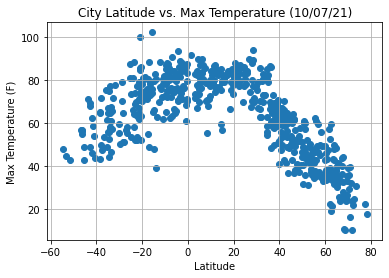

In [35]:
plt.scatter(clean_city_data['Lat'],clean_city_data['Max Temp'])
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs. Max Temperature (10/07/21)')
plt.grid()
plt.savefig("output_data/Latitude_Temperature.png") 
plt.show()

## Latitude vs. Humidity Plot

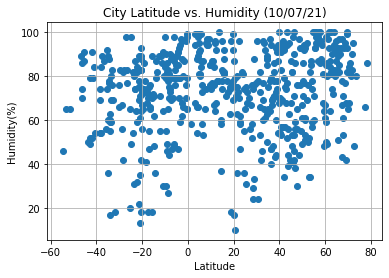

In [36]:
plt.scatter(clean_city_data['Lat'],clean_city_data['Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title('City Latitude vs. Humidity (10/07/21)')
plt.grid()
plt.savefig("output_data/Latitude_Humifity.png") 
plt.show()

## Latitude vs. Cloudiness Plot

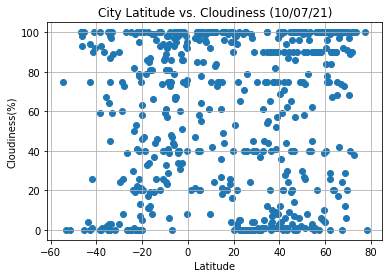

In [37]:
plt.scatter(clean_city_data['Lat'],clean_city_data['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title('City Latitude vs. Cloudiness (10/07/21)')
plt.grid()
plt.savefig("output_data/Latitude_Cloudiness.png") 
plt.show()

## Latitude vs. Wind Speed Plot

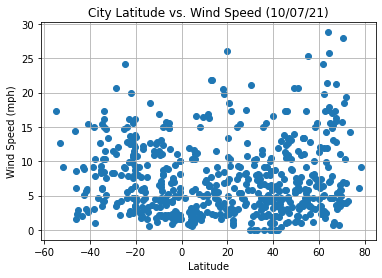

In [38]:
plt.scatter(clean_city_data['Lat'],clean_city_data['Wind Speed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs. Wind Speed (10/07/21)')
plt.grid()
plt.savefig("output_data/Latitude_Wind Speed.png") 
plt.show()

## Linear Regression

In [39]:
northern_city_weahter = clean_city_data.loc[clean_city_data['Lat'] >= 0,:]
southern_city_weahter = clean_city_data.loc[clean_city_data['Lat'] < 0,:]
print(northern_city_weahter.shape)
print(southern_city_weahter.shape)

(359, 9)
(201, 9)


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8736749068093009
The r-squared is: 0.7633078427882407


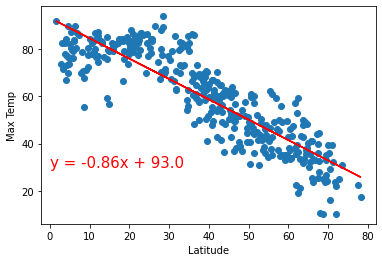

In [21]:
x_values=northern_city_weahter['Lat']
y_values=northern_city_weahter['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue}")
print(f"The r-squared is: {rvalue*rvalue}")
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6241003752250961
The r-squared is: 0.38950127835610576


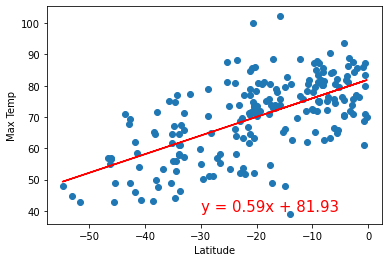

In [22]:
x_values=southern_city_weahter['Lat']
y_values=southern_city_weahter['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue}")
print(f"The r-squared is: {rvalue*rvalue}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.057273113613937415
The r-squared is: 0.0032802095430349834


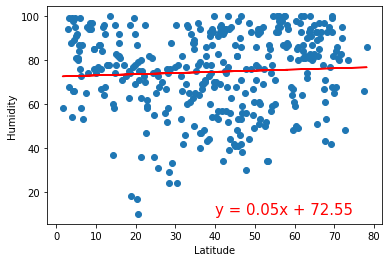

In [23]:
x_values=northern_city_weahter['Lat']
y_values=northern_city_weahter['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue}")
print(f"The r-squared is: {rvalue*rvalue}")
plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.14247204129247973
The r-squared is: 0.020298282550046048


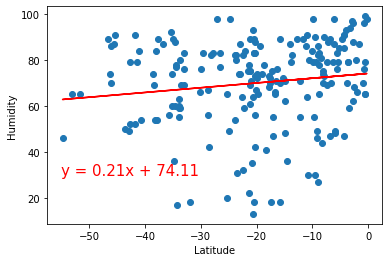

In [24]:
x_values=southern_city_weahter['Lat']
y_values=southern_city_weahter['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue}")
print(f"The r-squared is: {rvalue*rvalue}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.037530155884325164
The r-squared is: 0.0014085126007017468


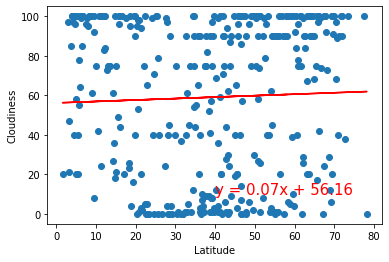

In [25]:
x_values=northern_city_weahter['Lat']
y_values=northern_city_weahter['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue}")
print(f"The r-squared is: {rvalue*rvalue}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.19149994288031957
The r-squared is: 0.03667222812316566


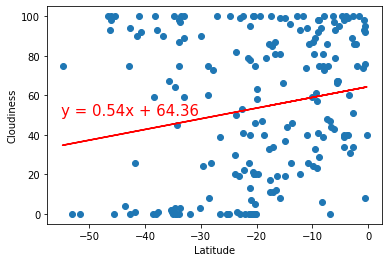

In [31]:
x_values=southern_city_weahter['Lat']
y_values=southern_city_weahter['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue}")
print(f"The r-squared is: {rvalue*rvalue}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.1878602524789673
The r-squared is: 0.03529147446146134


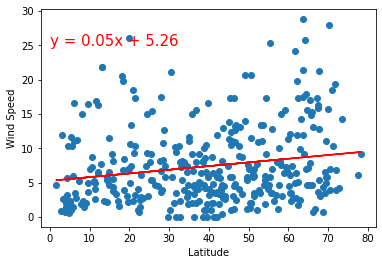

In [27]:
x_values=northern_city_weahter['Lat']
y_values=northern_city_weahter['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue}")
print(f"The r-squared is: {rvalue*rvalue}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.1905480478333833
The r-squared is: 0.03630855853311333


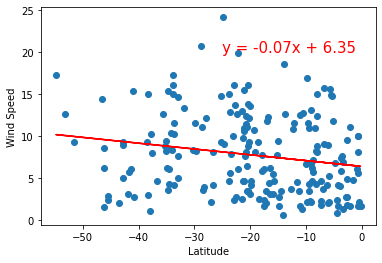

In [32]:
x_values=southern_city_weahter['Lat']
y_values=southern_city_weahter['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue}")
print(f"The r-squared is: {rvalue*rvalue}")
plt.show()

#### Northern Hemisphere - Cloudiness (%) vs. Humidity(%) Linear Regression

The r-value is: 0.3242045844820471
The r-squared is: 0.10510861259917681


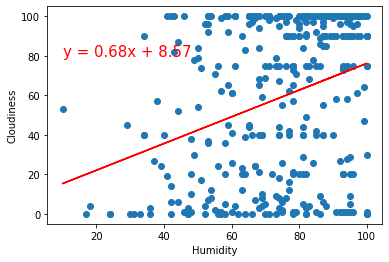

In [33]:
# Additional analysis
x_values=northern_city_weahter['Humidity']
y_values=northern_city_weahter['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,80),fontsize=15,color="red")
plt.xlabel('Humidity')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue}")
print(f"The r-squared is: {rvalue*rvalue}")
plt.show()

#### Southern Hemisphere - Cloudiness (%) vs. Humidity(%) Linear Regression

The r-value is: 0.23615782408088476
The r-squared is: 0.05577051787461811


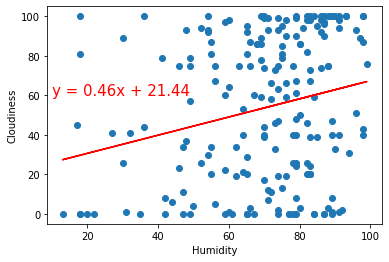

In [34]:
# Additional analysis
x_values=southern_city_weahter['Humidity']
y_values=southern_city_weahter['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,60),fontsize=15,color="red")
plt.xlabel('Humidity')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue}")
print(f"The r-squared is: {rvalue*rvalue}")
plt.show()